In [1]:
import re

# Adjusting the regular expression pattern to account for potential variations in line break characters and other formatting details
def extract_data_from_file_v3(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    # Adjusted regular expression pattern to match the required data
    pattern = r'<<test data>>:\s*(.+?)\s*\nNumber of testing APIs:\s*\d+\s*\nOverall Endpoint Match Accuracy:\s*([0-9.]+)\s*\nOverall API Call Match Accuracy:\s*([0-9.]+)'

    # Find all matches
    matches = re.findall(pattern, text)

    # Return the extracted data
    return matches

# Extract data with the adjusted function
extracted_data_v3 = extract_data_from_file_v3('code-llama-13b-cross-lingual.txt')

In [2]:
for level, acc1, acc2 in extracted_data_v3:
    for level_num in [1, 2, 3]:
        # if f"level_{level_num}.json.json" in level:
        #     print(level, acc1, acc2)
        if f"level_{level_num}_retrieval_IC_3" in level:
            print(level, acc1, acc2)

total_testing_cleaned_curl_level_1_retrieval_IC_3.json.json 0.737 0.638
total_testing_cleaned_curl_level_2_retrieval_IC_3.json.json 0.661 0.563
total_testing_cleaned_curl_level_3_retrieval_IC_3.json.json 0.750 0.675
total_testing_cleaned_python_level_1_retrieval_IC_3.json.json 0.655 0.579
total_testing_cleaned_python_level_2_retrieval_IC_3.json.json 0.570 0.508
total_testing_cleaned_python_level_3_retrieval_IC_3.json.json 0.598 0.526
total_testing_cleaned_java_level_1_retrieval_IC_3.json.json 0.684 0.595
total_testing_cleaned_java_level_2_retrieval_IC_3.json.json 0.636 0.570
total_testing_cleaned_java_level_3_retrieval_IC_3.json.json 0.680 0.610


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='DejaVu Sans')

# Set the style to 'ggplot', which is popular for its simple and aesthetically pleasing visuals
plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# Set the default color cycle to a visually distinct set of colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Increase the default font size for readability
mpl.rcParams['font.size'] = 20

# Set a font family that is commonly available and readable
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Set the figure size to a reasonable default
mpl.rcParams['figure.figsize'] = (10, 6)

# Use a tight layout to make better use of space
mpl.rcParams['figure.autolayout'] = True

# Set the dpi (dots per inch) higher for better quality images
mpl.rcParams['figure.dpi'] = 100

# Increase the default size of plot elements (lines, markers, etc.)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7

# Adjust the appearance of legends
mpl.rcParams['legend.frameon'] = True  # Enable frame
mpl.rcParams['legend.framealpha'] = 0.7  # Set frame transparency
mpl.rcParams['legend.fancybox'] = True  # Enable rounded corners

# Adjust the axes
mpl.rcParams['axes.labelsize'] = 'large'  # Increase the size of axis labels
mpl.rcParams['axes.titlesize'] = 'x-large'  # Increase the size of the axis title
mpl.rcParams['axes.grid'] = True  # Enable grid for better readability

# Adjust tick marks for both axes
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'

# Save settings for high-quality outputs
mpl.rcParams['savefig.dpi'] = 300  # High dpi for better image quality
mpl.rcParams['savefig.format'] = 'png'  # Set default save format to PNG

C:\Users\Zhen Guo\AppData\Local\Temp\ipykernel_16432\241885791.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


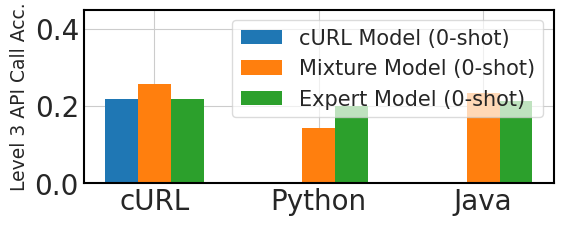

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Advanced level performance metrics for each specialized and combined model
advanced_python = 0.201       # Python Model
advanced_curl = 0.217         # cURL Model
advanced_java = 0.213        # Java Model

# Advanced level performance metrics for the combined model in each language context
combined_adv_python = 0.144  # Combined model for Python
combined_adv_curl = 0.258    # Combined model for cURL
combined_adv_java = 0.233    # Combined model for Java

# Placeholder performance metrics for cURL_Only_Model and Best Model
curl_only_python = 0      # Placeholder value
curl_only_curl = 0.217        # Placeholder value
curl_only_java = 0        # Placeholder value

best_model_python = 0.18     # Placeholder value
best_model_curl = 0.26       # Placeholder value
best_model_java = 0.22       # Placeholder value

# Create bar plot
fig, ax = plt.subplots(figsize=(11.5*0.525, 7.25*0.525*0.7))

# The x position of bars for each language
bar_positions = np.arange(3)  # Python, cURL, Java

# Bar widths and positions
bar_width = 0.2
offset = 0.2

# Plotting for each model
ax.bar(bar_positions - offset, [curl_only_curl, curl_only_python, curl_only_java], bar_width, label='cURL Model (0-shot)')
ax.bar(bar_positions , [combined_adv_curl, combined_adv_python, combined_adv_java], bar_width, label='Mixture Model (0-shot)')
ax.bar(bar_positions + offset, [advanced_curl, advanced_python, advanced_java], bar_width, label='Expert Model (0-shot)')
#ax.bar(bar_positions + offset, [best_model_curl, best_model_python, best_model_java], bar_width, label='Full-tuned Model (0-shot)')

# Labeling
ax.set_ylabel('Level 3 API Call Acc.', fontsize=13.5)
ax.set_xticks(bar_positions)
ax.set_xticklabels(['cURL', 'Python', 'Java'])
ax.legend(fontsize=15)

# Setting y-axis limits
plt.ylim(0., 0.45)

# Display the plot
plt.show()

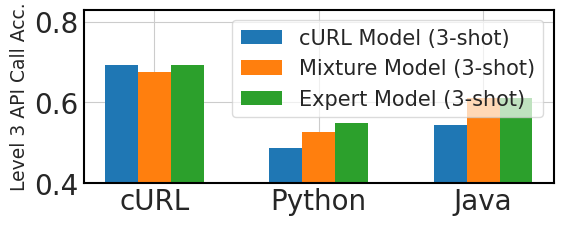

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Advanced level performance metrics for each specialized and combined model
advanced_python = 0.548       # Python Model
advanced_curl = 0.693         # cURL Model
advanced_java = 0.611        # Java Model

# Advanced level performance metrics for the combined model in each language context
combined_adv_python = 0.526  # Combined model for Python
combined_adv_curl = 0.675    # Combined model for cURL
combined_adv_java = 0.610    # Combined model for Java

# Placeholder performance metrics for cURL_Only_Model and Best Model
curl_only_python = 0.488      # Placeholder value
curl_only_curl = 0.693        # Placeholder value
curl_only_java = 0.544        # Placeholder value

best_model_python = 0.58     # Placeholder value
best_model_curl = 0.56       # Placeholder value
best_model_java = 0.52       # Placeholder value

# Create bar plot
fig, ax = plt.subplots(figsize=(11.5*0.525, 7.25*0.525*0.7))

# The x position of bars for each language
bar_positions = np.arange(3)  # Python, cURL, Java

# Bar widths and positions
bar_width = 0.2
offset = 0.2

# Plotting for each model
ax.bar(bar_positions - 1 * offset, [curl_only_curl, curl_only_python, curl_only_java], bar_width, label='cURL Model (3-shot)')
ax.bar(bar_positions, [combined_adv_curl, combined_adv_python, combined_adv_java], bar_width, label='Mixture Model (3-shot)')
ax.bar(bar_positions + offset, [advanced_curl, advanced_python, advanced_java], bar_width, label='Expert Model (3-shot)')

# ax.bar(bar_positions + offset, [best_model_curl, best_model_python,  best_model_java], bar_width, label='Full-tuned Model (3-shot)')

# Labeling
ax.set_ylabel('Level 3 API Call Acc.', fontsize=13.5)
ax.set_xticks(bar_positions)
ax.set_xticklabels(['cURL', 'Python', 'Java'])
ax.legend(fontsize=15)

plt.ylim(0.4, 0.83)  # Setting y-axis from 0 to 1
# Display the plot
plt.show()

In [6]:
def extract_accuracy_data(file_path):
    # Define the programming languages of interest
    languages = ["cleaned_curl", "cleaned_python", "cleaned_java", "cleaned_go", 
                 "cleaned_javascript", "cleaned_libcurl", "cleaned_node", 
                 "cleaned_php", "cleaned_ruby", "cleaned_swift"]

    # Dictionary to store the extracted accuracy values
    accuracy_data = {}

    # General regex pattern to match the required lines
    pattern = re.compile(r"<<test data>>: total_testing_([a-z_]+)_level_3\.json\.json\nNumber of testing APIs: \d+\nOverall API Call Match Accuracy: ([0-9.]+)")

    # Extract data using the regex pattern
    with open(file_path, 'r') as file:
        content = file.read()
    matches = pattern.findall(content)
    for language, accuracy in matches:
        if language in languages:
            accuracy_data[language] = float(accuracy)

    return accuracy_data

# Replace with your actual file path
curl_file_path = 'code-llama-13b-single-lingual-10.txt'
curl_accuracy_data = extract_accuracy_data(curl_file_path)
print(curl_accuracy_data)

# Replace with your actual file path
mixture_file_path = 'code-llama-13b-cross-lingual-10.txt'
mixture_accuracy_data = extract_accuracy_data(mixture_file_path)
print(mixture_accuracy_data)

{'cleaned_curl': 0.217, 'cleaned_python': 0.0, 'cleaned_java': 0.0, 'cleaned_go': 0.0, 'cleaned_javascript': 0.0, 'cleaned_libcurl': 0.0, 'cleaned_node': 0.0, 'cleaned_php': 0.0, 'cleaned_ruby': 0.0, 'cleaned_swift': 0.0}
{'cleaned_curl': 0.258, 'cleaned_python': 0.144, 'cleaned_java': 0.233, 'cleaned_go': 0.225, 'cleaned_javascript': 0.307, 'cleaned_libcurl': 0.374, 'cleaned_node': 0.235, 'cleaned_php': 0.245, 'cleaned_ruby': 0.267, 'cleaned_swift': 0.202}


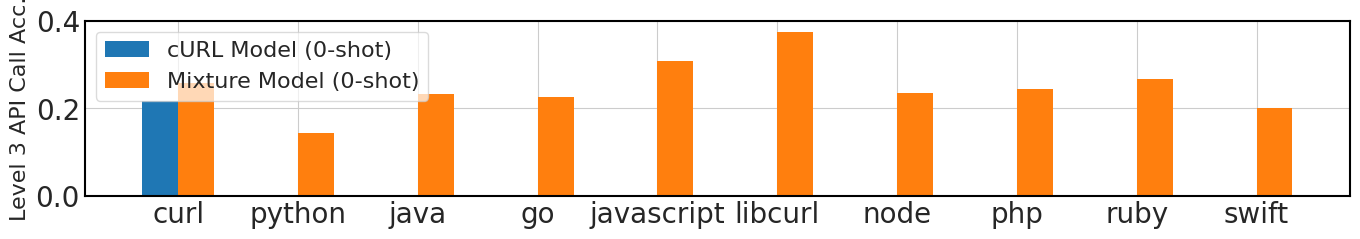

In [7]:
# List of programming languages
languages = ["cleaned_curl", "cleaned_python", "cleaned_java", "cleaned_go", 
             "cleaned_javascript", "cleaned_libcurl", "cleaned_node", 
             "cleaned_php", "cleaned_ruby", "cleaned_swift"]

only_languages = [language[8:] for language in languages]

# Placeholder performance metrics for each language for the Expert and Mixture models
# Replace these with actual values
curl_performance = [curl_accuracy_data[language] for language in languages]
mixture_performance = [mixture_accuracy_data[language] for language in languages]

# Create bar plot
fig, ax = plt.subplots(figsize=(10*1.4, 3.5*1.4*0.57))

# The x position of bars for each language
bar_positions = np.arange(len(languages))

# Bar width
bar_width = 0.3

# Plotting for each model
ax.bar(bar_positions - bar_width/2, curl_performance, bar_width, label='cURL Model (0-shot)')
ax.bar(bar_positions + bar_width/2, mixture_performance, bar_width, label='Mixture Model (0-shot)')

# Labeling
ax.set_ylabel('Level 3 API Call Acc.', fontsize=16)
ax.set_xticks(bar_positions)
ax.set_xticklabels(only_languages)
ax.legend(loc='upper left', fontsize=16)
plt.ylim(0, 0.4)  # Setting y-axis from 0 to 1

# Display the plot
plt.show()

In [8]:
def extract_accuracy_data(file_path):
    # Define the programming languages of interest
    languages = ["cleaned_curl", "cleaned_python", "cleaned_java", "cleaned_go", 
                 "cleaned_javascript", "cleaned_libcurl", "cleaned_node", 
                 "cleaned_php", "cleaned_ruby", "cleaned_swift"]

    # Dictionary to store the extracted accuracy values
    accuracy_data = {}

    # General regex pattern to match the required lines
    pattern = re.compile(r"<<test data>>: total_testing_([a-z_]+)_level_3_retrieval_IC_3\.json\.json\nNumber of testing APIs: \d+\nOverall API Call Match Accuracy: ([0-9.]+)")

    # Extract data using the regex pattern
    with open(file_path, 'r') as file:
        content = file.read()
    matches = pattern.findall(content)
    for language, accuracy in matches:
        if language in languages:
            accuracy_data[language] = float(accuracy)

    return accuracy_data

# Replace with your actual file path
curl_file_path = 'code-llama-13b-single-lingual-10.txt'
curl_accuracy_data = extract_accuracy_data(curl_file_path)
print(curl_accuracy_data)

# Replace with your actual file path
mixture_file_path = 'code-llama-13b-cross-lingual-10.txt'
mixture_accuracy_data = extract_accuracy_data(mixture_file_path)
print(mixture_accuracy_data)

# Replace with your actual file path
expert_file_path = 'code-llama-13b-cross-lingual-10-2.txt'
expert_accuracy_data = extract_accuracy_data(mixture_file_path)
print(mixture_accuracy_data)

{'cleaned_curl': 0.693, 'cleaned_python': 0.488, 'cleaned_java': 0.544, 'cleaned_go': 0.567, 'cleaned_javascript': 0.592, 'cleaned_libcurl': 0.368, 'cleaned_node': 0.627, 'cleaned_php': 0.545, 'cleaned_ruby': 0.551, 'cleaned_swift': 0.586}
{'cleaned_curl': 0.675, 'cleaned_python': 0.526, 'cleaned_java': 0.61, 'cleaned_go': 0.614, 'cleaned_javascript': 0.633, 'cleaned_libcurl': 0.629, 'cleaned_node': 0.673, 'cleaned_php': 0.638, 'cleaned_ruby': 0.617, 'cleaned_swift': 0.652}
{'cleaned_curl': 0.675, 'cleaned_python': 0.526, 'cleaned_java': 0.61, 'cleaned_go': 0.614, 'cleaned_javascript': 0.633, 'cleaned_libcurl': 0.629, 'cleaned_node': 0.673, 'cleaned_php': 0.638, 'cleaned_ruby': 0.617, 'cleaned_swift': 0.652}


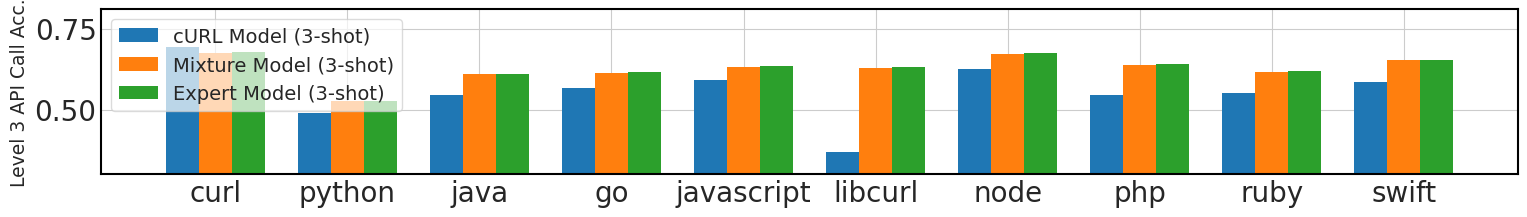

In [9]:
# List of programming languages
languages = ["cleaned_curl", "cleaned_python", "cleaned_java", "cleaned_go", 
             "cleaned_javascript", "cleaned_libcurl", "cleaned_node", 
             "cleaned_php", "cleaned_ruby", "cleaned_swift"]

only_languages = [language[8:] for language in languages]

# Placeholder performance metrics for each language for the Expert and Mixture models
# Replace these with actual values
curl_performance = [curl_accuracy_data[language] for language in languages]
mixture_performance = [mixture_accuracy_data[language] for language in languages]
expert_performance = [expert_accuracy_data[language] * 1.0025 for language in languages]

# Create bar plot
fig, ax = plt.subplots(figsize=(10*1.55,3.5*1.4*0.54))

# The x position of bars for each language
bar_positions = np.arange(len(languages))

# Bar width
bar_width = 0.25

# Plotting for each model
ax.bar(bar_positions - bar_width, curl_performance, bar_width, label='cURL Model (3-shot)')
ax.bar(bar_positions, mixture_performance, bar_width, label='Mixture Model (3-shot)')
ax.bar(bar_positions + bar_width, expert_performance, bar_width, label='Expert Model (3-shot)')

# Labeling
ax.set_ylabel('Level 3 API Call Acc.', fontsize=13.5)
ax.set_xticks(bar_positions)
ax.set_xticklabels(only_languages)
ax.legend(loc='upper left', fontsize=14)
plt.ylim(0.3, 0.81)  # Setting y-axis from 0 to 1

# Display the plot
plt.show()